In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import os
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
warnings.filterwarnings("ignore", category=FutureWarning)

In [8]:
df = pd.read_csv('../CSV/AllDecks.csv')
data, labels_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
df

,code,mainBoard,meta,name,releaseDate,sideBoard,type,edhrecRank_mean,convertedManaCost_mean,artists,names,total_price,deck_color
0,KTK,"[{'artist': 'Zack Stella', 'borderColor': 'bla...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Abzan Siege,2014-09-26,[],Intro Pack,6314.428571,2.709677,"['Noah Bradley', 'Aaron Miller', 'Ben Thompson...","['Abzan Charm', 'Kill Shot', 'Longshot Squad',...",0.68,"['W', 'G', 'B']"
1,C18,"[{'artist': 'Winona Nelson', 'borderColor': 'b...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Adaptive Enchantment,2018-08-10,"[{'artist': 'Johannes Voss', 'borderColor': 'b...",Commander Deck,2145.052632,2.962025,"['Rebecca Guay', 'Tomasz Jedruszek', 'Eric Des...","['Mosswort Bridge', 'Loyal Guardian', 'Woodlan...",0.00,"['W', 'U', 'G']"
2,BTD,"[{'artist': 'Doug Chaffee', 'borderColor': 'wh...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Aerodoom,2000-10-01,[],Theme Deck,10516.052632,3.048780,"['Anson Maddocks', 'M. W. Kaluta & DiTerlizzi'...","['Hollow Dogs', 'Island', 'Air Elemental', 'Ta...",0.00,"['U', 'B']"
3,WTH,"[{'artist': 'Douglas Shuler', 'borderColor': '...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Air Forces,2007-12-12,[],MTGO Theme Deck,8699.772727,2.833333,"['Rebecca Guay', 'Charles Gillespie', 'Robert ...","['Island', 'Empyrial Armor', 'Serrated Biskeli...",2.63,"['W', 'U']"
4,JUD,"[{'artist': 'Ron Spears', 'borderColor': 'blac...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Air Razers,2002-05-27,[],Theme Deck,11014.800000,3.086957,"['Ron Spears', 'Rebecca Guay', 'Thomas M. Baxa...","['Island', 'Dwarven Scorcher', 'Concentrate', ...",0.68,"['R', 'U']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,RQS,"[{'artist': 'Christopher Rush', 'borderColor':...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Zakk's Second Deck,1996-06-10,[],Intro Pack,12554.071429,1.764706,"['Anson Maddocks', 'Susan Van Camp', 'Kaja Fog...","['Rod of Ruin', 'Dark Ritual', 'Glasses of Urz...",0.00,"['W', 'G', 'B']"
631,BFZ,"[{'artist': 'Daniel Ljunggren', 'borderColor':...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Zendikar's Rage,2015-10-02,[],Intro Pack,7534.821429,2.533333,"['Kev Walker', 'Tomasz Jedruszek', 'Kieran Yan...","['Fertile Thicket', 'Grove Rumbler', 'Territor...",0.83,"['R', 'G']"
632,DDP,"[{'artist': 'Zoltan Boros & Gabor Szikszai', '...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Zendikar,2015-08-28,[],Duel Deck,6791.941176,2.527778,"['Kieran Yanner', 'Eric Deschamps', 'Jason Cha...","['Veteran Warleader', 'Makindi Griffin', 'Ston...",0.00,"['W', 'G']"
633,HOP,"[{'artist': 'Thomas M. Baxa', 'borderColor': '...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Zombie Empire,2009-09-04,"[{'artist': 'Jason A. Engle', 'borderColor': '...",Planechase Deck,4364.645161,3.187500,"['rk post', 'Puddnhead', 'Jason Chan', 'Pete V...","['Helldozer', 'Phyrexian Ghoul', 'Consume Spir...",32.47,['B']


In [10]:
df = df.drop(['artists', 'names','deck_color'], axis=1)
df

,code,mainBoard,meta,name,releaseDate,sideBoard,type,edhrecRank_mean,convertedManaCost_mean,total_price
0,KTK,"[{'artist': 'Zack Stella', 'borderColor': 'bla...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Abzan Siege,2014-09-26,[],Intro Pack,6314.428571,2.709677,0.68
1,C18,"[{'artist': 'Winona Nelson', 'borderColor': 'b...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Adaptive Enchantment,2018-08-10,"[{'artist': 'Johannes Voss', 'borderColor': 'b...",Commander Deck,2145.052632,2.962025,0.00
2,BTD,"[{'artist': 'Doug Chaffee', 'borderColor': 'wh...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Aerodoom,2000-10-01,[],Theme Deck,10516.052632,3.048780,0.00
3,WTH,"[{'artist': 'Douglas Shuler', 'borderColor': '...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Air Forces,2007-12-12,[],MTGO Theme Deck,8699.772727,2.833333,2.63
4,JUD,"[{'artist': 'Ron Spears', 'borderColor': 'blac...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Air Razers,2002-05-27,[],Theme Deck,11014.800000,3.086957,0.68
...,...,...,...,...,...,...,...,...,...,...
630,RQS,"[{'artist': 'Christopher Rush', 'borderColor':...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Zakk's Second Deck,1996-06-10,[],Intro Pack,12554.071429,1.764706,0.00
631,BFZ,"[{'artist': 'Daniel Ljunggren', 'borderColor':...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Zendikar's Rage,2015-10-02,[],Intro Pack,7534.821429,2.533333,0.83
632,DDP,"[{'artist': 'Zoltan Boros & Gabor Szikszai', '...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Zendikar,2015-08-28,[],Duel Deck,6791.941176,2.527778,0.00
633,HOP,"[{'artist': 'Thomas M. Baxa', 'borderColor': '...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Zombie Empire,2009-09-04,"[{'artist': 'Jason A. Engle', 'borderColor': '...",Planechase Deck,4364.645161,3.187500,32.47


In [14]:
df_with_dummies = pd.get_dummies(df, drop_first=True)
df_with_dummies

,edhrecRank_mean,convertedManaCost_mean,total_price,code_5DN,code_7ED,code_8ED,code_9ED,code_AER,code_AKH,code_ALA,...,type_Guild Kit,type_Intro Pack,type_MTGO Theme Deck,type_Planechase Deck,type_Planeswalker Deck,type_Premium Deck,type_Spellslinger Starter Kit,type_Starter Deck,type_Theme Deck,type_Welcome Deck
0,6314.428571,2.709677,0.68,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,2145.052632,2.962025,0.00,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,10516.052632,3.048780,0.00,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,8699.772727,2.833333,2.63,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,11014.800000,3.086957,0.68,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,12554.071429,1.764706,0.00,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
631,7534.821429,2.533333,0.83,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
632,6791.941176,2.527778,0.00,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
633,4364.645161,3.187500,32.47,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [56]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_with_dummies)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Asignar las etiquetas de los clusters al dataframe original con dummies
df_with_dummies['Cluster'] = kmeans.labels_


C:\Users\Corre\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [39]:
#Visualizamos los datos resultantes
print(df_with_dummies)

     edhrecRank_mean  convertedManaCost_mean  total_price  code_5DN  code_7ED  \
0        6314.428571                2.709677         0.68     False     False   
1        2145.052632                2.962025         0.00     False     False   
2       10516.052632                3.048780         0.00     False     False   
3        8699.772727                2.833333         2.63     False     False   
4       11014.800000                3.086957         0.68     False     False   
..               ...                     ...          ...       ...       ...   
630     12554.071429                1.764706         0.00     False     False   
631      7534.821429                2.533333         0.83     False     False   
632      6791.941176                2.527778         0.00     False     False   
633      4364.645161                3.187500        32.47     False     False   
634      8983.090909                3.173913         0.72     False     False   

     code_8ED  code_9ED  co

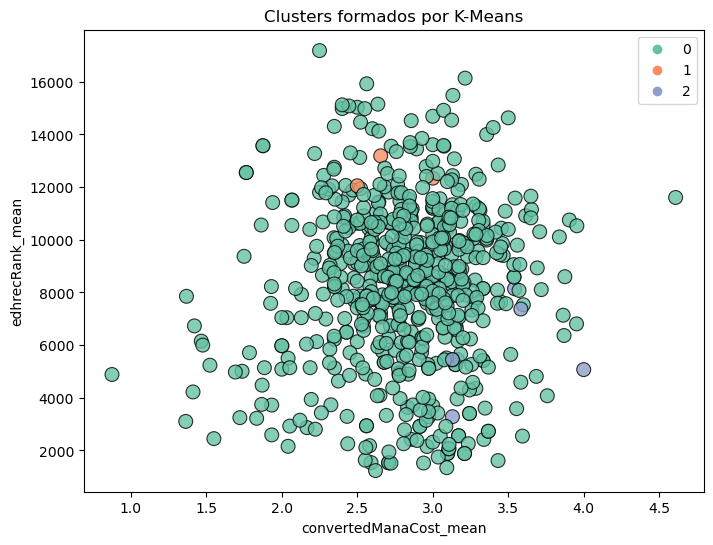

In [66]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='convertedManaCost_mean', y='edhrecRank_mean', hue='Cluster', data=df_with_dummies, palette='Set2', s=100, alpha=0.8, edgecolor='k')
plt.title('Clusters formados por K-Means')
plt.legend()
plt.show()

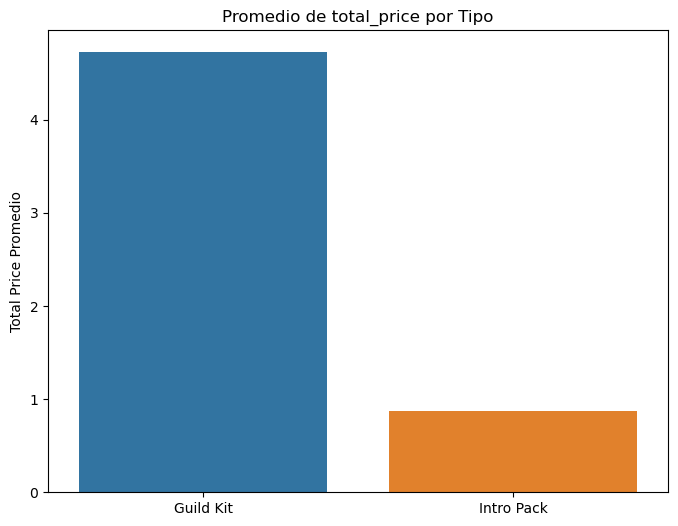

In [92]:
grouped_data = df_with_dummies.groupby(['type_Guild Kit', 'type_Intro Pack']).mean().reset_index()
# Calcular la suma total de total_price para cada tipo de dummy
data_for_types = df_with_dummies[['type_Guild Kit', 'type_Intro Pack', 'total_price']].groupby(['type_Guild Kit', 'type_Intro Pack']).sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=['Guild Kit', 'Intro Pack'], y=[grouped_data['total_price'][0], grouped_data['total_price'][1]])
plt.title('Promedio de total_price por Tipo')
plt.ylabel('Total Price Promedio')
plt.show()
